In [2]:
import os
import csv
import pandas as pd
import numpy as np
from kloppy import statsbomb
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
from src.Preprocess_events import preprocess_event

### Check the competition id from statsboomb 
#### Big leagues data
- Laliga
- Premier League
- Bundesliga
- Serie A
- Champions League

In [3]:
competitions = pd.read_json("https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json")
competition_dict = {competitions.loc[i, 'competition_id'] : competitions.loc[i, 'competition_name']  for i in range(len(competitions))}
competition_dict

selected_competitions = ['La Liga', 'Premier League', '1. Bundesliga', 'Serie A', 'Champions League']
competition_list  = list(set(competitions[competitions.competition_name.isin(selected_competitions)].competition_id))

### Preprocessing event dataset

In [4]:
competition_list

[2, 9, 11, 12, 16]

In [5]:
preprocess_event(competition_list, eventtype = ['pass', 'shot'])

La Liga: 100%|██████████| 868/868 [13:16<00:00,  1.09it/s]


La Liga_dataset.csv 저장완료


Serie A: 100%|██████████| 381/381 [13:08<00:00,  2.07s/it]


Serie A_dataset.csv 저장완료


Champions League: 100%|██████████| 17/17 [00:13<00:00,  1.25it/s]

Champions League_dataset.csv 저장완료


In [5]:
csv_lis = os.listdir('./data/traindataset/')

In [6]:
csv_list = []
for i in csv_lis:
    t_df = pd.read_csv('./data/traindataset/{}'.format(i))
    csv_list.append(t_df)

In [7]:
df = pd.concat(csv_list)

In [8]:
df.head()

,Unnamed: 0,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,pass_type
0,0,644e16d7-10ca-45f0-8128-fc0055d6f753,PASS,COMPLETE,True,1,0.482,0.935238,alive,Hoffenheim,Hoffenheim,Mark Uth,60.95,40.05,60.15,37.85,5460.0,KICK_OFF,LEFT_FOOT,NaN
1,1,77e2ddaf-6de3-49e7-a318-7d765799b543,PASS,COMPLETE,True,1,1.015,2.166865,alive,Hoffenheim,Hoffenheim,Andrej Kramarić,59.35,38.25,53.85,42.05,6039.0,NaN,LEFT_FOOT,NaN
2,2,2c51f271-c812-45af-896b-06f49a14a5bb,PASS,COMPLETE,True,1,2.954,4.343406,alive,Hoffenheim,Hoffenheim,Sebastian Rudy,52.25,45.15,34.25,61.95,5537.0,NaN,RIGHT_FOOT,NaN
3,3,8b29246d-1d69-4f01-abe1-91c22e308620,PASS,COMPLETE,True,1,5.894,8.451696,alive,Hoffenheim,Hoffenheim,Fabian Lukas Schär,34.25,61.85,37.45,23.65,12321.0,NaN,RIGHT_FOOT,LONG_BALL
4,4,ed35929b-31b4-42bf-8b54-2db442ce478f,PASS,COMPLETE,True,1,10.652,12.069774,alive,Hoffenheim,Hoffenheim,Tobias Strobl,38.45,22.15,36.65,35.45,9396.0,NaN,RIGHT_FOOT,NaN


### coordinates of goal events

In [44]:
# except for penalty shotout
df = df[df['period_id'] != 5]
# only for shot event
df_shot = df[df['event_type'] == 'SHOT']

In [45]:
df_shot.head()

,Unnamed: 0,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,pass_type
76,76,ba46e9d6-e828-4599-952c-39c1f7d22659,SHOT,OFF_TARGET,False,1,261.052,NaN,alive,Hoffenheim,Hoffenheim,Tarik Elyounoussi,108.05,31.15,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN
104,104,85d67225-30fb-47c8-b478-cf568941a164,SHOT,GOAL,True,1,387.395,NaN,alive,Schalke 04,Schalke 04,Klaas-Jan Huntelaar,110.85,42.55,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN
119,119,adac17d3-5e67-4e8c-b482-4bae2f36e06e,SHOT,BLOCKED,False,1,496.762,NaN,alive,Hoffenheim,Hoffenheim,Kevin Volland,117.85,29.05,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN
178,178,abffd193-62bc-4c8d-8636-1e3f0f0ebbe5,SHOT,GOAL,True,1,835.721,NaN,alive,Schalke 04,Schalke 04,Jean-Eric Maxim Choupo-Moting,101.75,27.55,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN
217,217,d9cea903-f92a-40e1-a393-1a849d83f157,SHOT,SAVED,False,1,1036.953,NaN,alive,Schalke 04,Schalke 04,Klaas-Jan Huntelaar,109.25,26.45,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN


(array([8.0000e+00, 1.4000e+01, 4.7000e+01, 6.6000e+01, 1.1400e+02,
        1.0920e+03, 7.7550e+03, 1.3595e+04, 1.8542e+04, 9.2180e+03]),
 array([ 35.35,  43.85,  52.35,  60.85,  69.35,  77.85,  86.35,  94.85,
        103.35, 111.85, 120.35]),
 <BarContainer object of 10 artists>)

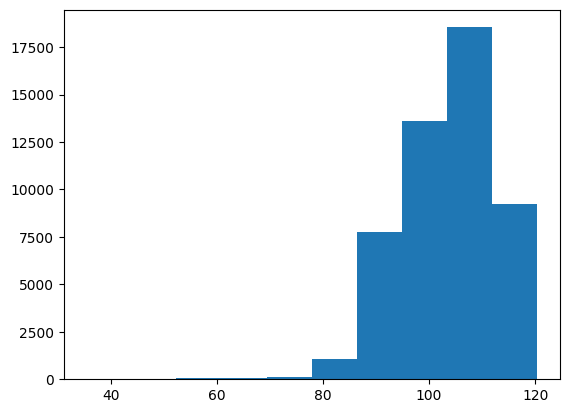

In [46]:
plt.hist(df_shot['coordinates_x'])

(array([   39.,   156.,  2777.,  9647., 13826., 12927.,  8748.,  2189.,
           99.,    43.]),
 array([ 0.25,  8.22, 16.19, 24.16, 32.13, 40.1 , 48.07, 56.04, 64.01,
        71.98, 79.95]),
 <BarContainer object of 10 artists>)

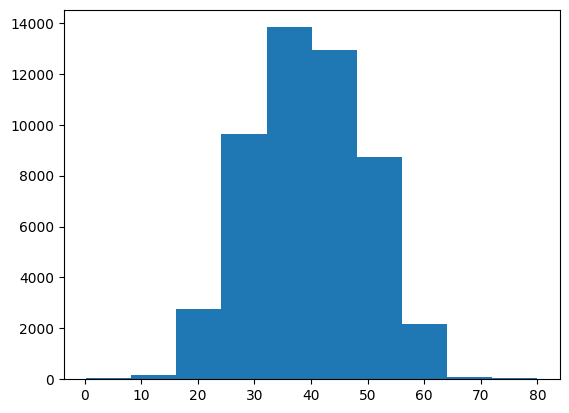

In [47]:
plt.hist(df_shot['coordinates_y'])

In [48]:
## sample 10 goals
np.random.seed(1)
sample_idx = np.random.choice(range(len(df_shot)), size=10)

In [49]:
df_shot.iloc[sample_idx,:]['coordinates_y']
df_shot.iloc[sample_idx,:]

,Unnamed: 0,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,pass_type
50964,374,e8516751-b826-4bd9-86a5-7e01893aa1d4,SHOT,GOAL,True,1,2138.606,NaN,alive,Juventus,Juventus,Paulo Bruno Exequiel Dybala,101.35,51.45,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN
77337,942,a1b47aad-7023-4ee5-85ef-d0c24598a215,SHOT,OFF_TARGET,False,2,2532.283,NaN,alive,Real Sociedad,Real Sociedad,Jonathas Cristian de Jesus,94.45,52.55,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN
202418,533,5d11ef9e-4e28-43b4-92ae-2ad29dc55955,SHOT,GOAL,True,1,2555.452,NaN,alive,Borussia Dortmund,Borussia Dortmund,Matthias Ginter,115.45,30.85,NaN,NaN,NaN,NaN,HEAD,NaN
31009,1134,729c6a54-1607-4dee-aa5e-859505baadd2,SHOT,SAVED,False,2,2680.287,NaN,alive,Fiorentina,Fiorentina,Nikola Kalinić,108.05,40.05,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN
85882,770,a9ba7de4-9ac9-43e3-8f77-9d4a8d15600f,SHOT,OFF_TARGET,False,2,1906.332,NaN,alive,AC Milan,AC Milan,Mario Barwuah Balotelli,96.05,49.85,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN
358585,525,c15b0f36-a383-40fe-925b-a357c42106aa,SHOT,OFF_TARGET,False,2,358.940,NaN,alive,Crystal Palace,Crystal Palace,Scott Dann,108.95,35.25,NaN,NaN,NaN,NaN,HEAD,NaN
302822,456,3993a9bc-90b2-4c61-9014-358abbf25acf,SHOT,OFF_TARGET,False,1,2321.901,NaN,alive,Hamburger SV,Hamburger SV,Sven Schipplock,112.25,55.45,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN
55168,912,fe34dfd5-6bb3-4245-b1aa-a85daff29f8d,SHOT,GOAL,True,2,2799.257,NaN,alive,Athletic Club,Athletic Club,Aritz Aduriz Zubeldia,113.45,42.95,NaN,NaN,NaN,NaN,HEAD,NaN
47228,801,4c9117a1-70b5-4674-a5d0-d3219c537579,SHOT,SAVED,False,2,1452.824,NaN,alive,Chievo,Chievo,Riccardo Meggiorini,92.25,49.45,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN
20601,669,fe4a8cb5-bf2c-460b-86d9-bfde1a1388d6,SHOT,GOAL,True,2,429.616,NaN,alive,Athletic Club,Athletic Club,Aritz Aduriz Zubeldia,117.15,38.15,NaN,NaN,NaN,NaN,HEAD,NaN


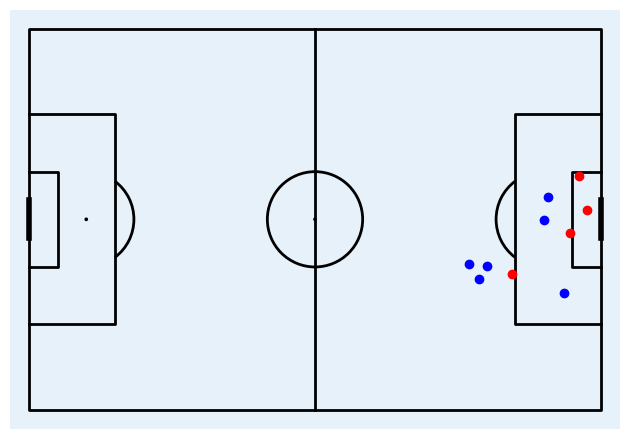

In [50]:
pitch = Pitch(pitch_color='#e7f1fa', line_zorder=1, line_color='black', pitch_type="statsbomb")
fig, ax = pitch.draw()
for i in sample_idx:
    if df_shot.iloc[i]['result'] == 'GOAL':
        col = 'red'
    else :
        col = 'blue'  
    ax.scatter(df_shot.iloc[i]['coordinates_x'], df_shot.iloc[i]['coordinates_y'], color = col)

### Distance from goal line and on-target angle
- statsbomb pitch size (120, 80)
- goal post size (w, h) = (7.32, 2.44)
- goal post point (x1, y1), (x2, y2) = (120, 43.66), (120, 36.34)

In [51]:
def distance(points):
    output = np.sqrt(((np.array([120, 40]) - points)**2).sum(axis=1))
    return output

In [66]:
def on_target_angle(points):
    c = 7.32
    a = np.sqrt(((np.array([120, 43.66]) - points)**2).sum(axis=1))
    b = np.sqrt(((np.array([120, 36.34]) - points)**2).sum(axis=1))
    cos_theta = (a**2 + b**2 - c**2)/(2 * a * b)
    theta = np.arccos(cos_theta)
    return theta 

In [67]:
shot_points = pd.concat([df_shot['coordinates_x'], df_shot['coordinates_y']], axis=1).values

In [68]:
round(len(df_shot[df_shot['result'] == 'GOAL'])*100/len(df_shot), 2) 

11.07

In [69]:
df_shot['shot_distance'] = distance(shot_points)
df_shot['shot_angle'] = on_target_angle(shot_points)

In [75]:
dt = df_shot[['success', 'shot_distance', 'shot_angle', 'body_part_type']]

In [76]:
dt

,success,shot_distance,shot_angle,body_part_type
76,False,14.870272,0.398559,LEFT_FOOT
104,True,9.498684,0.717001,RIGHT_FOOT
119,False,11.159077,0.140683,LEFT_FOOT
178,True,22.092193,0.274342,LEFT_FOOT
217,False,17.296387,0.268703,RIGHT_FOOT
...,...,...,...,...
100694,False,25.094322,0.266107,RIGHT_FOOT
100739,False,29.515504,0.242203,RIGHT_FOOT
100783,False,14.567944,0.488906,RIGHT_FOOT
100809,True,11.884654,0.459844,RIGHT_FOOT


In [77]:
set(dt.body_part_type)

{'HEAD', 'LEFT_FOOT', 'OTHER', 'RIGHT_FOOT'}

In [80]:
dt['success'].iloc[0] == False

True

In [84]:
dt['success'] = dt['success'].apply(lambda x:1 if x else 0)

In [95]:
dt = pd.concat([dt.loc[:,~dt.columns.isin(['body_part_type'])],pd.get_dummies(dt['body_part_type'])], axis=1)

In [96]:
dt.head()

,success,shot_distance,shot_angle,HEAD,LEFT_FOOT,OTHER,RIGHT_FOOT
76,0,14.870272,0.398559,0,1,0,0
104,1,9.498684,0.717001,0,0,0,1
119,0,11.159077,0.140683,0,1,0,0
178,1,22.092193,0.274342,0,1,0,0
217,0,17.296387,0.268703,0,0,0,1


In [179]:
x = dt.loc[:, dt.columns != 'success'].values
y = dt['success'].values

#### logistic regression model

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [181]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [184]:
lr.score(X_train, y_train)

0.8927898909811695

In [185]:
lr.score(X_test, y_test)

0.8922802497274799

#### Model validation

In [277]:
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import recall_score, precision_score

In [278]:
lr.score(X_test, y_test)

0.8922802497274799

In [281]:
dt.loc[:, dt.columns != 'success'].columns

Index(['shot_distance', 'shot_angle', 'HEAD', 'LEFT_FOOT', 'OTHER',
       'RIGHT_FOOT'],
      dtype='object')

In [282]:
lr.coef_

array([[-8.90182988,  5.61003942, -0.87703302,  0.61151436, -0.39605651,
         0.66204942]])

In [283]:
recall_score(y_true= y_train, y_pred = lr.predict(X_train))

0.10617283950617284

In [284]:
np.random.seed(30)
sample_idx2 = np.random.choice(range(len(dt)), 100)

In [285]:
sample_x = X[sample_idx2,:]
sample_y = y[sample_idx2]

In [287]:
lr.predict(sample_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [288]:
predicted_score = lr.decision_function(sample_x)

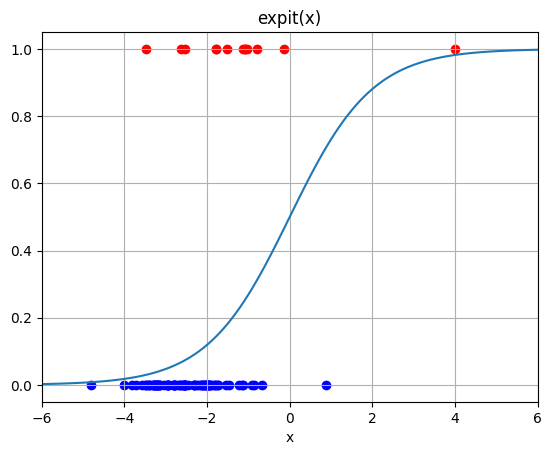

In [289]:
from scipy.special import expit
x_ = np.linspace(-6, 6, 121)
y_ = expit(x_)
plt.plot(x_, y_)
for i in range(len(sample_y)):
    if sample_y[i] == 1:
        color = 'red'
    else :
        color = 'blue'
    plt.scatter(predicted_score[i], sample_y[i], color = color)
plt.grid()
plt.xlim(-6, 6)
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

In [291]:
y_pred_proba = lr.predict_proba(X_test)[::,1]

#### Test-set goal probability distribution (every shots)

(array([6402., 2236.,  803.,  264.,  164.,  103.,   50.,   34.,   22.,
          13.]),
 array([5.25073410e-05, 9.90255507e-02, 1.97998594e-01, 2.96971637e-01,
        3.95944681e-01, 4.94917724e-01, 5.93890767e-01, 6.92863811e-01,
        7.91836854e-01, 8.90809897e-01, 9.89782941e-01]),
 <BarContainer object of 10 artists>)

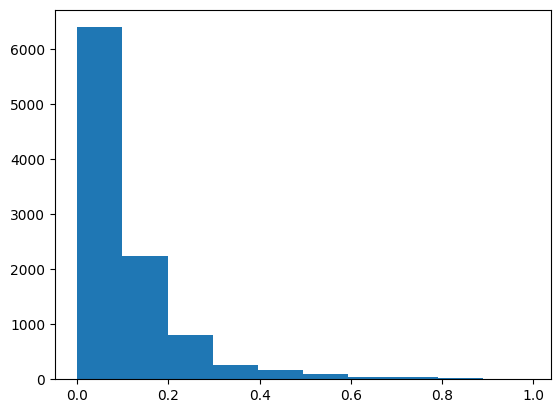

In [293]:
plt.hist(y_pred_proba)

In [300]:
#### Test-set goal probability distribution (only goals)

(array([290., 341., 225.,  72.,  70.,  53.,  25.,  25.,  17.,  11.]),
 array([0.00221102, 0.10096821, 0.1997254 , 0.29848259, 0.39723979,
        0.49599698, 0.59475417, 0.69351136, 0.79226856, 0.89102575,
        0.98978294]),
 <BarContainer object of 10 artists>)

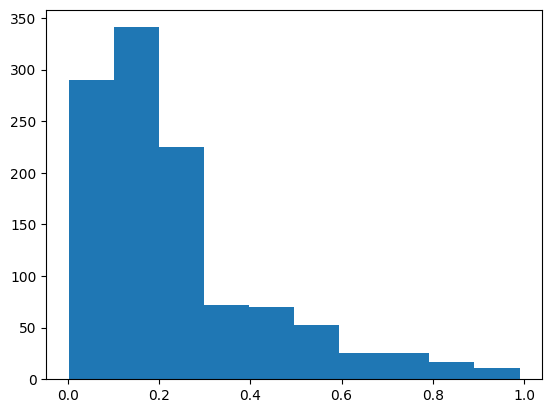

In [298]:
plt.hist(lr.predict_proba(X_test[y_test == 1])[::,1])

In [ ]:
y_pred_proba = lr.predict_proba(X_test)[::,1]

In [257]:
auc = roc_auc_score(y_test, y_pred_proba)

In [262]:
model_fpr, model_tpr, threshold1 = roc_curve(y_test, y_pred_proba)

In [304]:
auc(model_fpr, model_tpr)

0.7830754357192429

Text(0, 0.5, 'TPR')

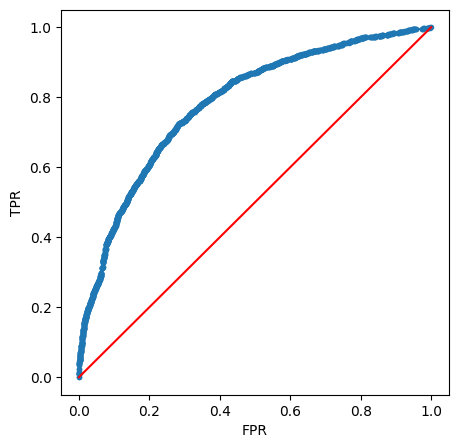

In [307]:
plt.figure(figsize = (5,5))
plt.plot(model_fpr, model_tpr, marker = '.', label = "Logistic")
plt.plot([0, 1], [0, 1], 'red')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [318]:
print(np.sum(y_test))
print(np.sum(y_pred_proba))

1129
1119.511738133534


In [360]:
print(np.sum(y))
print(np.sum(lr.predict_proba(X)[::,1]))

5584
5574.476575819223


(array([31769., 11611.,  3924.,  1306.,   784.,   464.,   285.,   150.,
           93.,    65.]),
 array([5.25073410e-05, 9.90255507e-02, 1.97998594e-01, 2.96971637e-01,
        3.95944681e-01, 4.94917724e-01, 5.93890767e-01, 6.92863811e-01,
        7.91836854e-01, 8.90809897e-01, 9.89782941e-01]),
 <BarContainer object of 10 artists>)

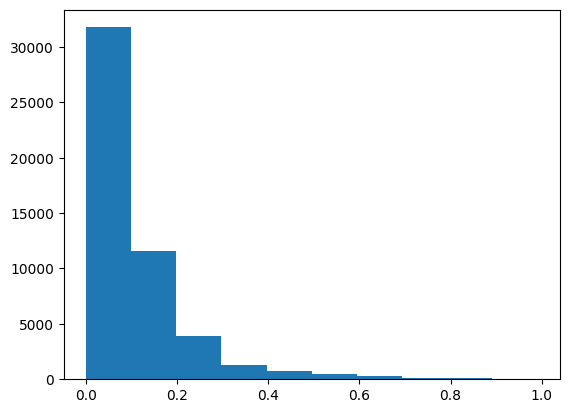

In [ ]:
plt.hist(lr.predict_proba(X)[:,1])

In [365]:
df_shot['xG'] = lr.predict_proba(X)[:,1]
df_shot.head()

,Unnamed: 0,event_id,event_type,result,success,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,...,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,set_piece_type,body_part_type,pass_type,shot_distance,shot_angle,xG
76,76,ba46e9d6-e828-4599-952c-39c1f7d22659,SHOT,OFF_TARGET,False,1,261.052,NaN,alive,Hoffenheim,...,31.15,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN,14.870272,0.398559,0.139280
104,104,85d67225-30fb-47c8-b478-cf568941a164,SHOT,GOAL,True,1,387.395,NaN,alive,Schalke 04,...,42.55,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN,9.498684,0.717001,0.341579
119,119,adac17d3-5e67-4e8c-b482-4bae2f36e06e,SHOT,BLOCKED,False,1,496.762,NaN,alive,Hoffenheim,...,29.05,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN,11.159077,0.140683,0.128704
178,178,abffd193-62bc-4c8d-8636-1e3f0f0ebbe5,SHOT,GOAL,True,1,835.721,NaN,alive,Schalke 04,...,27.55,NaN,NaN,NaN,NaN,LEFT_FOOT,NaN,22.092193,0.274342,0.058857
217,217,d9cea903-f92a-40e1-a393-1a849d83f157,SHOT,SAVED,False,1,1036.953,NaN,alive,Schalke 04,...,26.45,NaN,NaN,NaN,NaN,RIGHT_FOOT,NaN,17.296387,0.268703,0.095441


In [370]:
df_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50451 entries, 76 to 100829
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50451 non-null  int64  
 1   event_id            50451 non-null  object 
 2   event_type          50451 non-null  object 
 3   result              50451 non-null  object 
 4   success             50451 non-null  object 
 5   period_id           50451 non-null  int64  
 6   timestamp           50451 non-null  float64
 7   end_timestamp       0 non-null      float64
 8   ball_state          50451 non-null  object 
 9   ball_owning_team    50451 non-null  object 
 10  team_id             50451 non-null  object 
 11  player_id           50451 non-null  object 
 12  coordinates_x       50451 non-null  float64
 13  coordinates_y       50451 non-null  float64
 14  end_coordinates_x   0 non-null      float64
 15  end_coordinates_y   0 non-null      float64
 16  re

#### Analysis of player xG

In [389]:
import plotly.graph_objs as go
import plotly.express as px

In [343]:
player_shot_df = df_shot.groupby('player_id').count().sort_values(by='event_id', ascending=False)['event_id']

##### 100 > attempt

In [374]:
df_shot_filtered = df_shot[df_shot['player_id'].isin(player_shot_df[player_shot_df > 100].index)]

In [375]:
df_shot_filtered.groupby('player_id').mean()['xG']

player_id
Alexis Alejandro Sánchez Sánchez       0.139367
Andrés Iniesta Luján                   0.087407
Anthony Modeste                        0.134621
Antoine Griezmann                      0.136636
Aritz Aduriz Zubeldia                  0.152940
Bojan Krkíc Pérez                      0.124407
Christian Dannemann Eriksen            0.055539
Cristiano Ronaldo dos Santos Aveiro    0.108878
Daniel Alves da Silva                  0.052641
David Villa Sánchez                    0.113637
Fabio Quagliarella                     0.111897
Francesc Fàbregas i Soler              0.116539
Franco Damián Vázquez                  0.092439
Gareth Frank Bale                      0.102288
Gerard Piqué Bernabéu                  0.176235
Giacomo Bonaventura                    0.078048
Gnégnéri Yaya Touré                    0.076652
Gonzalo Gerardo Higuaín                0.135635
Harry Kane                             0.126291
Iago Aspas Juncal                      0.145659
Ivan Rakitić                  

In [383]:
df_shot_filtered[df_shot_filtered['result']=='GOAL'].groupby('player_id').count()['event_id'] / df_shot_filtered.groupby('player_id').count()['event_id'] 

player_id
Alexis Alejandro Sánchez Sánchez       0.183406
Andrés Iniesta Luján                   0.067204
Anthony Modeste                        0.135135
Antoine Griezmann                      0.182203
Aritz Aduriz Zubeldia                  0.169231
Bojan Krkíc Pérez                      0.187050
Christian Dannemann Eriksen            0.058824
Cristiano Ronaldo dos Santos Aveiro    0.135693
Daniel Alves da Silva                  0.064655
David Villa Sánchez                    0.168367
Fabio Quagliarella                     0.079208
Francesc Fàbregas i Soler              0.155280
Franco Damián Vázquez                  0.077586
Gareth Frank Bale                      0.207207
Gerard Piqué Bernabéu                  0.137363
Giacomo Bonaventura                    0.056604
Gnégnéri Yaya Touré                    0.079646
Gonzalo Gerardo Higuaín                0.193878
Harry Kane                             0.157233
Iago Aspas Juncal                      0.166667
Ivan Rakitić                  

In [387]:
df1 = pd.concat([df_shot_filtered.groupby('player_id').mean()['xG'],
           df_shot_filtered[df_shot_filtered['result']=='GOAL'].groupby('player_id').count()['event_id'] / df_shot_filtered.groupby('player_id').count()['event_id']],
           axis = 1)
df1.columns = ['xG', 'goal per shot']


In [391]:
df1.head()

,xG,goal per shot
player_id,,
Alexis Alejandro Sánchez Sánchez,0.139367,0.183406
Andrés Iniesta Luján,0.087407,0.067204
Anthony Modeste,0.134621,0.135135
Antoine Griezmann,0.136636,0.182203
Aritz Aduriz Zubeldia,0.152940,0.169231


In [425]:
df1

,xG,goal per shot
player_id,,
Alexis Alejandro Sánchez Sánchez,0.139367,0.183406
Andrés Iniesta Luján,0.087407,0.067204
Anthony Modeste,0.134621,0.135135
Antoine Griezmann,0.136636,0.182203
Aritz Aduriz Zubeldia,0.152940,0.169231
Bojan Krkíc Pérez,0.124407,0.187050
Christian Dannemann Eriksen,0.055539,0.058824
Cristiano Ronaldo dos Santos Aveiro,0.108878,0.135693
Daniel Alves da Silva,0.052641,0.064655


In [447]:
t_df = df1.reset_index()
fig = px.scatter(data_frame=df1.reset_index(), y="xG", x="goal per shot", custom_data='player_id', width=600, height=500)
fig.update_xaxes(range=[0, 0.25])
fig.update_yaxes(range=[0, 0.25])
fig.add_trace(go.Scatter(x=[0,0.5], y=[0,0.5]))
fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate = "player : %{customdata} <br>" + 
                  '<br>' + 
                  'xG : %{y} <br>' + 
                  'G/Shot : %{x}')
fig.show()

In [470]:
t_df = df1.reset_index()
t_df['xG margin'] =  t_df['xG'] - t_df['goal per shot']
fig = px.scatter(data_frame=t_df, x="xG margin", y="goal per shot", custom_data='player_id', width=800, height=500, 
                 )
fig.update_xaxes(range=[-0.15, 0.15], title_text='xG margin')
fig.update_yaxes(range=[0, 0.25], title_text='GCR(Goal Conversion Rate)')
fig.add_trace(go.Scatter(x=[0,0], y=[0,0.35]))
fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate = "player : %{customdata} <br>" + 
                  '<br>' + 
                  'xG : %{x:.3f} <br>' + 
                  'G/Shot : %{y:.3f}')
fig.update_layout(hoverlabel_bgcolor="white",
                  hoverlabel_font_size=10,
                  hoverlabel_font_color='black',
                  hoverlabel_font_family="Rockwell")
fig.update_xaxes(showspikes=True, spikecolor="gray", spikesnap="cursor", spikethickness=1)
fig.update_yaxes(showspikes=True, spikecolor="gray", spikethickness=1)
fig.show()